# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url_cities = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | loiza
Processing Record 5 of Set 1 | san pedro pochutla
Processing Record 6 of Set 1 | kalyandurg
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | paulden
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | prince george
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | hammerfest
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | shofirkon shahri
City not found. Skipping...
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of Set 1 | mount gambier
Processin

Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | solok
Processing Record 42 of Set 4 | calama
Processing Record 43 of Set 4 | costa teguise
City not found. Skipping...
Processing Record 44 of Set 4 | san antonio de pale
Processing Record 45 of Set 4 | byumba
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | plauen
Processing Record 48 of Set 4 | ad dabbah
Processing Record 49 of Set 4 | udachny
Processing Record 0 of Set 5 | holualoa
Processing Record 1 of Set 5 | sabrosa
Processing Record 2 of Set 5 | zvezdnyy
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | gwadar
Processing Record 5 of Set 5 | montagu
Processing Record 6 of Set 5 | hawaiian paradise park
Processing Record 7 of Set 5 | ca mau
Processing Record 8 of Set 5 | san jeronimo de juarez
Processing Record 9 of Set 5 | arthur's town
City not found. Skipping...
Processing Record 10 of Set 5 | itaueira
Processing Record 11 of Set 5 | vilyuchinsk
Processing Reco

Processing Record 35 of Set 8 | livani
Processing Record 36 of Set 8 | tarawa
Processing Record 37 of Set 8 | mudgee
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | petropavlovsk-kamchatsky
Processing Record 41 of Set 8 | usinsk
Processing Record 42 of Set 8 | kapuskasing
Processing Record 43 of Set 8 | magadan
Processing Record 44 of Set 8 | pathein
Processing Record 45 of Set 8 | minas de marcona
Processing Record 46 of Set 8 | kourou
Processing Record 47 of Set 8 | paradera
City not found. Skipping...
Processing Record 48 of Set 8 | kavieng
Processing Record 49 of Set 8 | kyren
Processing Record 0 of Set 9 | olyokminsk
Processing Record 1 of Set 9 | plastun
Processing Record 2 of Set 9 | nadym
Processing Record 3 of Set 9 | coron
Processing Record 4 of Set 9 | sokolovyy
Processing Record 5 of Set 9 | tateyama
Processing Record 6 of Set 9 | asau village
City not found. Skipping...
Processing Record 7 of Set 9 | amravati
Proce

Processing Record 24 of Set 12 | koryazhma
Processing Record 25 of Set 12 | mata-utu
Processing Record 26 of Set 12 | warrnambool
Processing Record 27 of Set 12 | sovetskiy
Processing Record 28 of Set 12 | shangri-la
City not found. Skipping...
Processing Record 29 of Set 12 | akureyri
Processing Record 30 of Set 12 | suva
Processing Record 31 of Set 12 | carnarvon
Processing Record 32 of Set 12 | usogorsk
Processing Record 33 of Set 12 | mandalgovi
Processing Record 34 of Set 12 | manistee
Processing Record 35 of Set 12 | qamdo
Processing Record 36 of Set 12 | sur
Processing Record 37 of Set 12 | massakory
Processing Record 38 of Set 12 | odesskoye
Processing Record 39 of Set 12 | lovisa
Processing Record 40 of Set 12 | manikpur
Processing Record 41 of Set 12 | mablethorpe
City not found. Skipping...
Processing Record 42 of Set 12 | dzhangala
Processing Record 43 of Set 12 | siwa oasis
Processing Record 44 of Set 12 | arquitecto tomas romero pereira
Processing Record 45 of Set 12 | oc

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,286.38,96,93,2.24,NZ,1690155391
1,port-aux-francais,-49.3500,70.2167,278.63,94,83,15.85,TF,1690155107
2,adamstown,-25.0660,-130.1015,293.62,69,35,7.63,PN,1690155107
3,loiza,18.4313,-65.8802,303.15,73,40,5.14,PR,1690155391
4,san pedro pochutla,15.7333,-96.4667,295.99,70,95,1.82,MX,1690155392


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,286.38,96,93,2.24,NZ,1690155391
1,port-aux-francais,-49.3500,70.2167,278.63,94,83,15.85,TF,1690155107
2,adamstown,-25.0660,-130.1015,293.62,69,35,7.63,PN,1690155107
3,loiza,18.4313,-65.8802,303.15,73,40,5.14,PR,1690155391
4,san pedro pochutla,15.7333,-96.4667,295.99,70,95,1.82,MX,1690155392


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

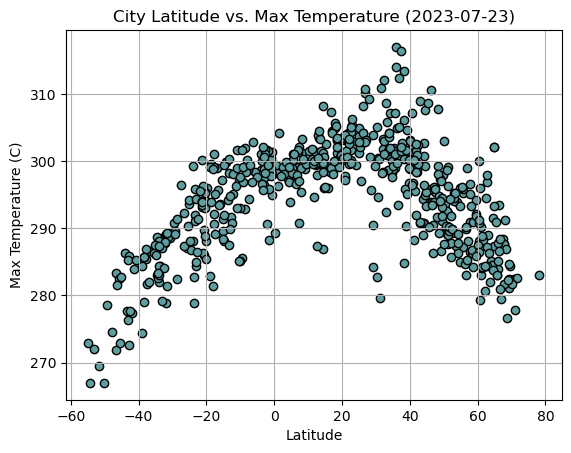

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="cadetblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

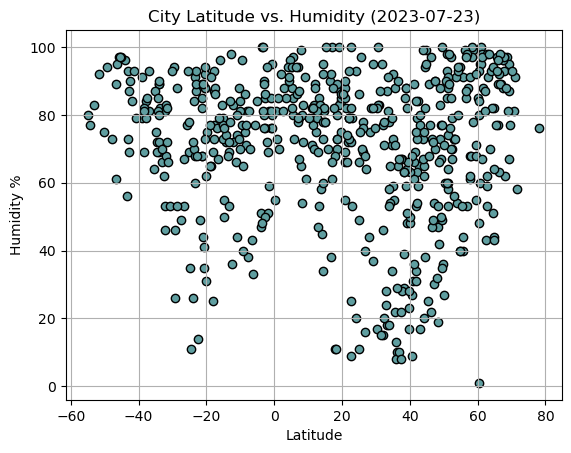

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="cadetblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

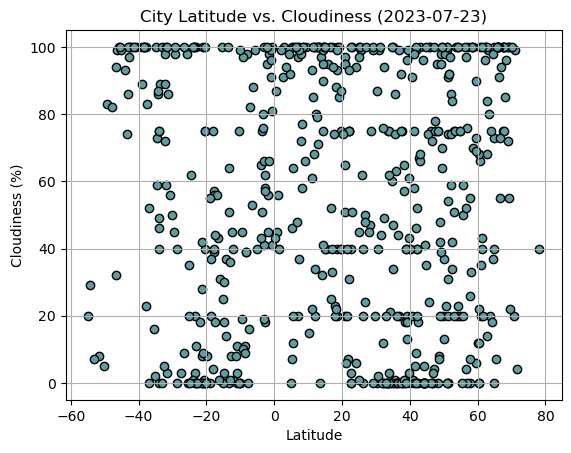

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], facecolor="cadetblue", edgecolor="Black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

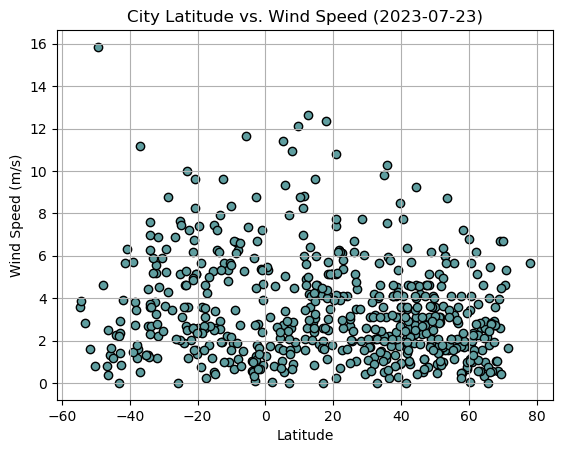

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], facecolor="cadetblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


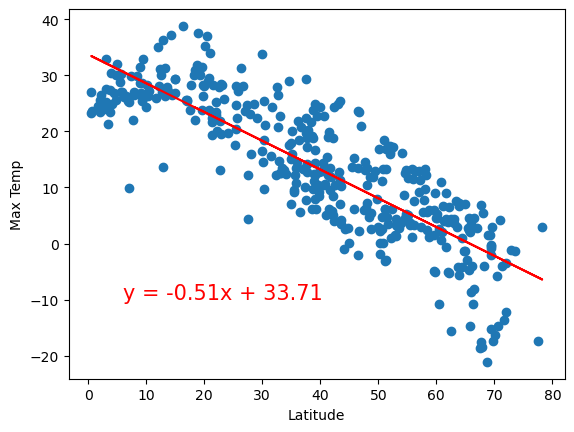

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


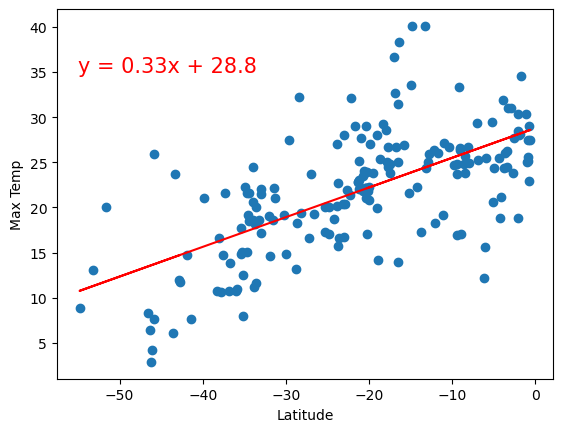

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


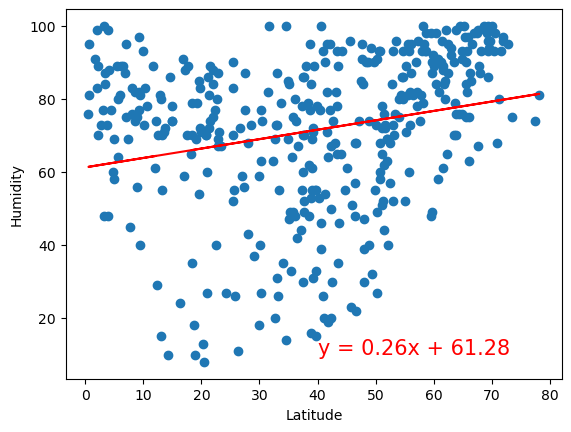

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


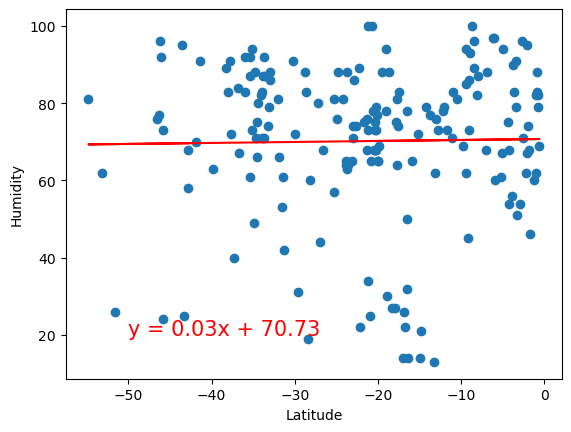

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


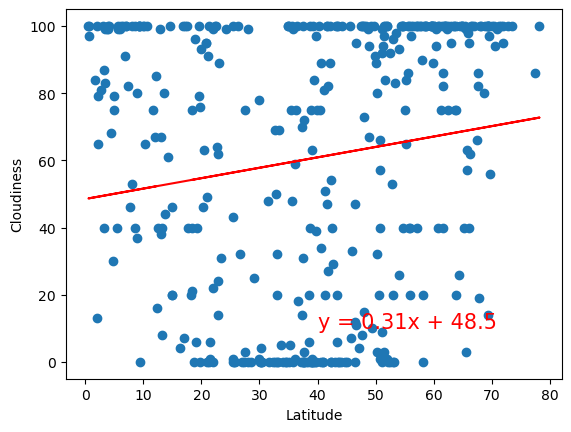

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


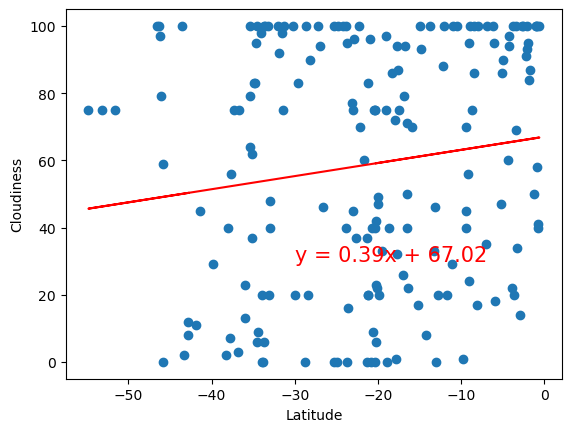

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


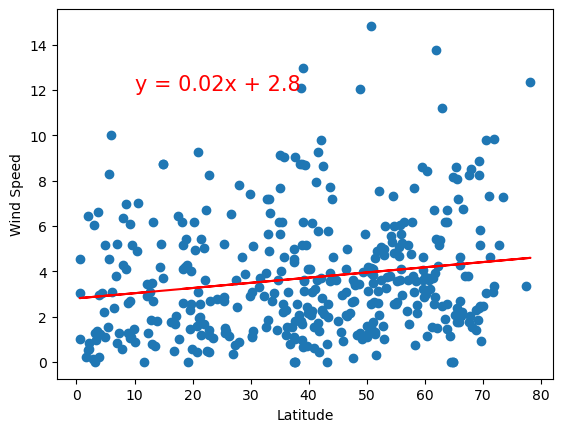

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


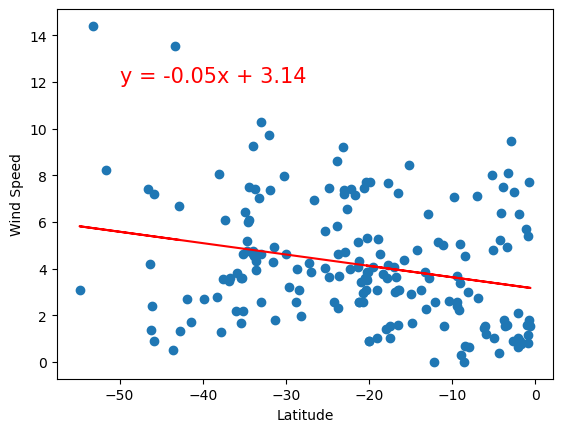

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE